<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.721432,39.586314,-0.002437,92.305309,92.301890,0.003418
1,0.0,1.0,60.928514,61.478576,-0.031356,132.375734,132.410371,-0.034637
2,0.0,2.0,87.736888,42.048635,0.059898,139.845421,139.789539,0.055883
3,0.0,3.0,84.102697,80.713229,0.067991,174.883917,174.828711,0.055205
4,0.0,4.0,43.938795,61.616016,-0.093854,115.460957,115.554629,-0.093672
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.213600,66.056389,0.126197,115.396185,115.268118,0.128067
249996,999.0,246.0,94.970335,91.225141,-0.023340,196.172136,196.188451,-0.016315
249997,999.0,247.0,68.796997,71.428964,-0.040697,150.185264,150.220565,-0.035301
249998,999.0,248.0,31.087391,43.454923,-0.122686,84.419628,84.539319,-0.119691


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    42.721432  39.586314 -0.002437   92.305309   92.301890  0.003418
      1.0    60.928514  61.478576 -0.031356  132.375734  132.410371 -0.034637
      2.0    87.736888  42.048635  0.059898  139.845421  139.789539  0.055883
      3.0    84.102697  80.713229  0.067991  174.883917  174.828711  0.055205
      4.0    43.938795  61.616016 -0.093854  115.460957  115.554629 -0.093672
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.213600  66.056389  0.126197  115.396185  115.268118  0.128067
      246.0  94.970335  91.225141 -0.023340  196.172136  196.188451 -0.016315
      247.0  68.796997  71.428964 -0.040697  150.185264  150.220565 -0.035301
      248.0  31.087391  43.454923 -0.122686   84.419628   84.539319 -0.119691
      249.0  81.576872  22.188392  0.181712  113.946976  113.753237  0.193739

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    42.721432  39.586314 -0.002437   92.305309   92.301890  0.003418
      1.0    60.928514  61.478576 -0.031356  132.375734  132.410371 -0.034637
      2.0    87.736888  42.048635  0.059898  139.845421  139.789539  0.055883
      3.0    84.102697  80.713229  0.067991  174.883917  174.828711  0.055205
      4.0    43.938795  61.616016 -0.093854  115.460957  115.554629 -0.093672
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.213600  66.056389  0.126197  115.396185  115.268118  0.128067
      246.0  94.970335  91.225141 -0.023340  196.172136  196.188451 -0.016315
      247.0  68.796997  71.428964 -0.040697  150.185264  150.220565 -0.035301
      248.0  31.087391  43.454923 -0.122686   84.419628   84.539319 -0.119691
      249.0  81.576872  22.188392  0.181712  113.946976  113.753237  0.193739

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.721432,39.586314,-0.002437,92.305309,92.301890,0.003418
1,0.0,1.0,60.928514,61.478576,-0.031356,132.375734,132.410371,-0.034637
2,0.0,2.0,87.736888,42.048635,0.059898,139.845421,139.789539,0.055883
3,0.0,3.0,84.102697,80.713229,0.067991,174.883917,174.828711,0.055205
4,0.0,4.0,43.938795,61.616016,-0.093854,115.460957,115.554629,-0.093672
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,39.213600,66.056389,0.126197,115.396185,115.268118,0.128067
249996,999.0,246.0,94.970335,91.225141,-0.023340,196.172136,196.188451,-0.016315
249997,999.0,247.0,68.796997,71.428964,-0.040697,150.185264,150.220565,-0.035301
249998,999.0,248.0,31.087391,43.454923,-0.122686,84.419628,84.539319,-0.119691


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    42.721432  39.586314 -0.002437   92.305309   92.301890  0.003418
      1.0    60.928514  61.478576 -0.031356  132.375734  132.410371 -0.034637
      2.0    87.736888  42.048635  0.059898  139.845421  139.789539  0.055883
      3.0    84.102697  80.713229  0.067991  174.883917  174.828711  0.055205
      4.0    43.938795  61.616016 -0.093854  115.460957  115.554629 -0.093672
...                ...        ...       ...         ...         ...       ...
999.0 245.0  39.213600  66.056389  0.126197  115.396185  115.268118  0.128067
      246.0  94.970335  91.225141 -0.023340  196.172136  196.188451 -0.016315
      247.0  68.796997  71.428964 -0.040697  150.185264  150.220565 -0.035301
      248.0  31.087391  43.454923 -0.122686   84.419628   84.539319 -0.119691
      249.0  81.576872  22.188392  0.181712  113.946976  113.753237  0.193739

[250000 rows x 6 columns]

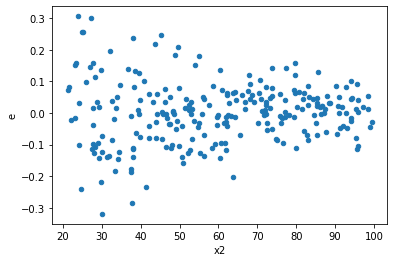

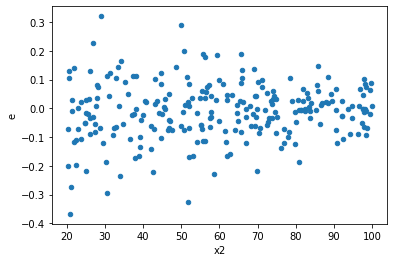

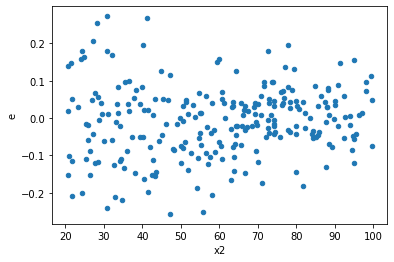

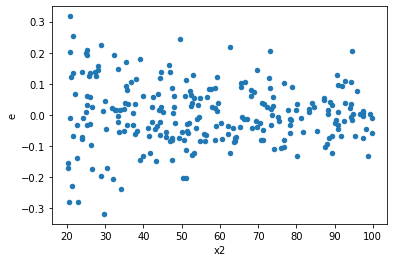

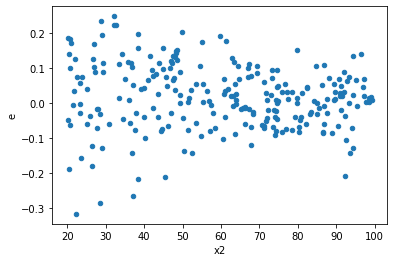

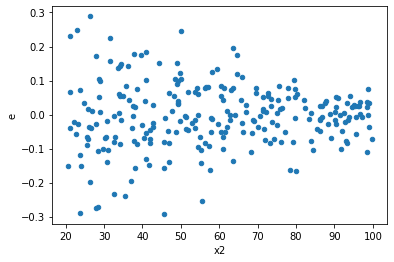

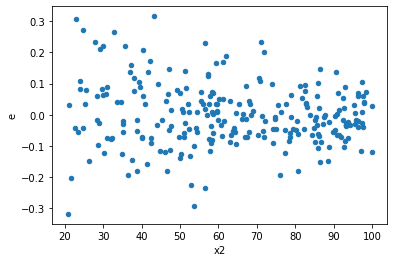

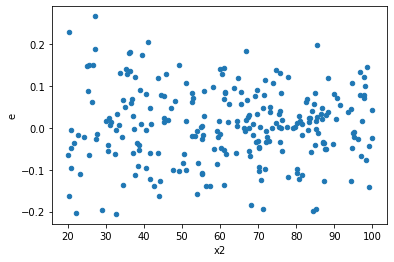

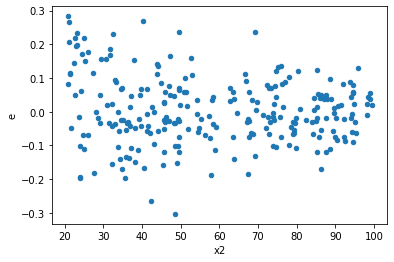

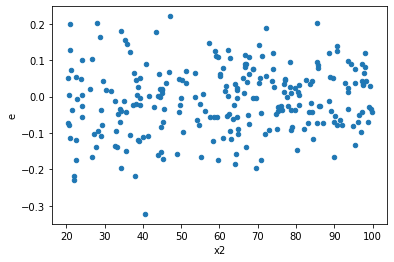

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,114.0,132.0,0.8593946707331406,1.5030903476581678,0.007538549743273163,0.011387048088319453,1.5105091133053015,0.02236076001610643,0.9888196199919468,0.011180380008053215,Reject001=1 : Homoscedasticity
2.0,123.0,123.0,1.0952631038808227,1.1340826895347225,0.008904578080331892,0.00922018446776197,1.0354431602017369,0.8471610643792928,0.5764194678103536,0.4235805321896464,Reject001=1 : Homoscedasticity
3.0,116.0,130.0,1.138786063083851,1.324406655117757,0.009817121233481475,0.010187743500905823,1.0377526424101124,0.8350415153438693,0.5824792423280654,0.41752075767193464,Reject001=1 : Homoscedasticity
4.0,131.0,115.0,0.6032023738618024,1.5438478841341308,0.004604598273754217,0.013424764209862007,2.9155125836670526,1.1219737583445522e-08,0.9999999943901312,5.609868791722761e-09,Reject001=0 : Heteroscedasticity
5.0,123.0,123.0,0.7431203695143778,1.3872853588661884,0.006041629020442096,0.011278742755009662,1.8668380194890453,0.0006098568758430289,0.9996950715620785,0.00030492843792151447,Reject001=0 : Heteroscedasticity
6.0,125.0,121.0,1.018503216364223,1.3254528683765532,0.008148025730913784,0.010954155936996307,1.3443938812608316,0.10261873951764011,0.9486906302411799,0.051309369758820056,Reject001=1 : Homoscedasticity
8.0,113.0,133.0,0.8776879539909226,1.5173207181190738,0.007767150035317899,0.011408426452023111,1.4688046967224806,0.03317619918886239,0.9834119004055688,0.016588099594431194,Reject001=1 : Homoscedasticity
10.0,102.0,144.0,0.6822590201971401,1.7270587006105846,0.0066888139235013735,0.011993463198684615,1.793062766560926,0.0012589003826020129,0.999370549808699,0.0006294501913010064,Reject001=0 : Heteroscedasticity
11.0,136.0,110.0,1.2629679498002027,1.2850566411366986,0.00928652904264855,0.011682333101242715,1.2579870312784671,0.21123445956524511,0.8943827702173774,0.10561722978262256,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,117.0,1.4220112424427185,0.9302295998157871,0.011023342964672236,0.007950680340305874,0.7212585479546745,0.07031859816245531,Reject001=1 : Homoscedasticity
1.0,114.0,132.0,0.8593946707331406,1.5030903476581678,0.007538549743273163,0.011387048088319453,1.5105091133053015,0.02236076001610643,Reject001=1 : Homoscedasticity
2.0,123.0,123.0,1.0952631038808227,1.1340826895347225,0.008904578080331892,0.00922018446776197,1.0354431602017369,0.8471610643792928,Reject001=1 : Homoscedasticity
3.0,116.0,130.0,1.138786063083851,1.324406655117757,0.009817121233481475,0.010187743500905823,1.0377526424101124,0.8350415153438693,Reject001=1 : Homoscedasticity
4.0,131.0,115.0,0.6032023738618024,1.5438478841341308,0.004604598273754217,0.013424764209862007,2.9155125836670526,1.1219737583445522e-08,Reject001=0 : Heteroscedasticity
5.0,123.0,123.0,0.7431203695143778,1.3872853588661884,0.006041629020442096,0.011278742755009662,1.8668380194890453,0.0006098568758430289,Reject001=0 : Heteroscedasticity
6.0,125.0,121.0,1.018503216364223,1.3254528683765532,0.008148025730913784,0.010954155936996307,1.3443938812608316,0.10261873951764011,Reject001=1 : Homoscedasticity
7.0,127.0,119.0,1.0514537546789557,0.8797959087102103,0.008279163422668942,0.007393242930337902,0.8929939600050257,0.5299007683445666,Reject001=1 : Homoscedasticity
8.0,113.0,133.0,0.8776879539909226,1.5173207181190738,0.007767150035317899,0.011408426452023111,1.4688046967224806,0.03317619918886239,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    546
Reject001=1 : Homoscedasticity      454
Name: Result_test, dtype: int64